In [ ]:
! pip install networkx numpy

In [ ]:
import networkx as nx
import numpy as np

In [ ]:
# # Use wget to download the dataset directly to Colab
# !wget https://snap.stanford.edu/data/web-Stanford.txt.gz

# # Load the Dataset
# web_graph = nx.read_edgelist('web-Stanford.txt.gz', create_using=nx.DiGraph())


In [ ]:
import io

# Assuming you've uploaded the 'congress.edgelist' file in Colab

# Specify the file name (adjust accordingly)
file_name = 'congress.edgelist'

# Read the edgelist file and create a directed graph
with open(file_name, 'r', encoding='latin-1') as file:
    web_graph = nx.read_edgelist(file, create_using=nx.DiGraph())

# Display basic information about the graph
print("Number of nodes:", web_graph.number_of_nodes())
print("Number of edges:", web_graph.number_of_edges())


Number of nodes: 475
Number of edges: 13289


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Calculate PageRank
pagerank_scores = nx.pagerank(web_graph, alpha=0.85)


In [ ]:
# Display PageRank scores
for node, score in sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"Node {node}: PageRank Score {score}")


Node 322: PageRank Score 0.016696348346432712
Node 147: PageRank Score 0.01284547899543367
Node 389: PageRank Score 0.011027513079843659
Node 269: PageRank Score 0.010660376611844975
Node 215: PageRank Score 0.010580181938756334
Node 208: PageRank Score 0.008884507050075667
Node 92: PageRank Score 0.008246330775933399
Node 246: PageRank Score 0.008157359884250825
Node 303: PageRank Score 0.008032912635346012
Node 113: PageRank Score 0.008025960920590098
Node 318: PageRank Score 0.007797644153865723
Node 111: PageRank Score 0.007745271287365469
Node 192: PageRank Score 0.007491201333430082
Node 335: PageRank Score 0.007461241285459702
Node 461: PageRank Score 0.007087350961085709
Node 263: PageRank Score 0.006917948733777199
Node 188: PageRank Score 0.006866693415222387
Node 254: PageRank Score 0.006815464660130113
Node 197: PageRank Score 0.0066837455936698265
Node 190: PageRank Score 0.006653211073369597
Node 401: PageRank Score 0.006480222237242981
Node 385: PageRank Score 0.00643795

In [ ]:
# Calculate the sum of all PageRank scores
pagerank_sum = sum(pagerank_scores.values())

# Print the sum
print(f"Sum of PageRank scores: {pagerank_sum}")

# Check if the sum is close to 1.0
if np.isclose(pagerank_sum, 1.0):
    print("The sum of PageRank scores is approximately 1.0.")
else:
    print("Warning: The sum of PageRank scores is not close to 1.0. It might be due to numerical precision.")


Sum of PageRank scores: 1.0
The sum of PageRank scores is approximately 1.0.


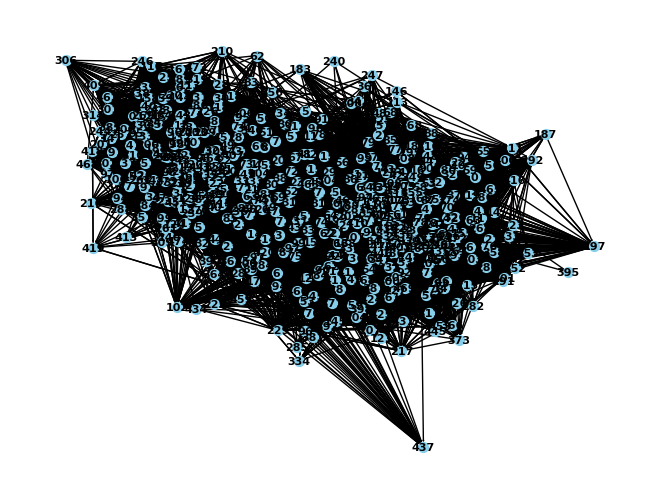

In [ ]:
import matplotlib.pyplot as plt

# Visualization (Optional)
pos = nx.spring_layout(web_graph)
nx.draw(web_graph, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrowsize=1)
plt.show()
#//too large a graph to run on this

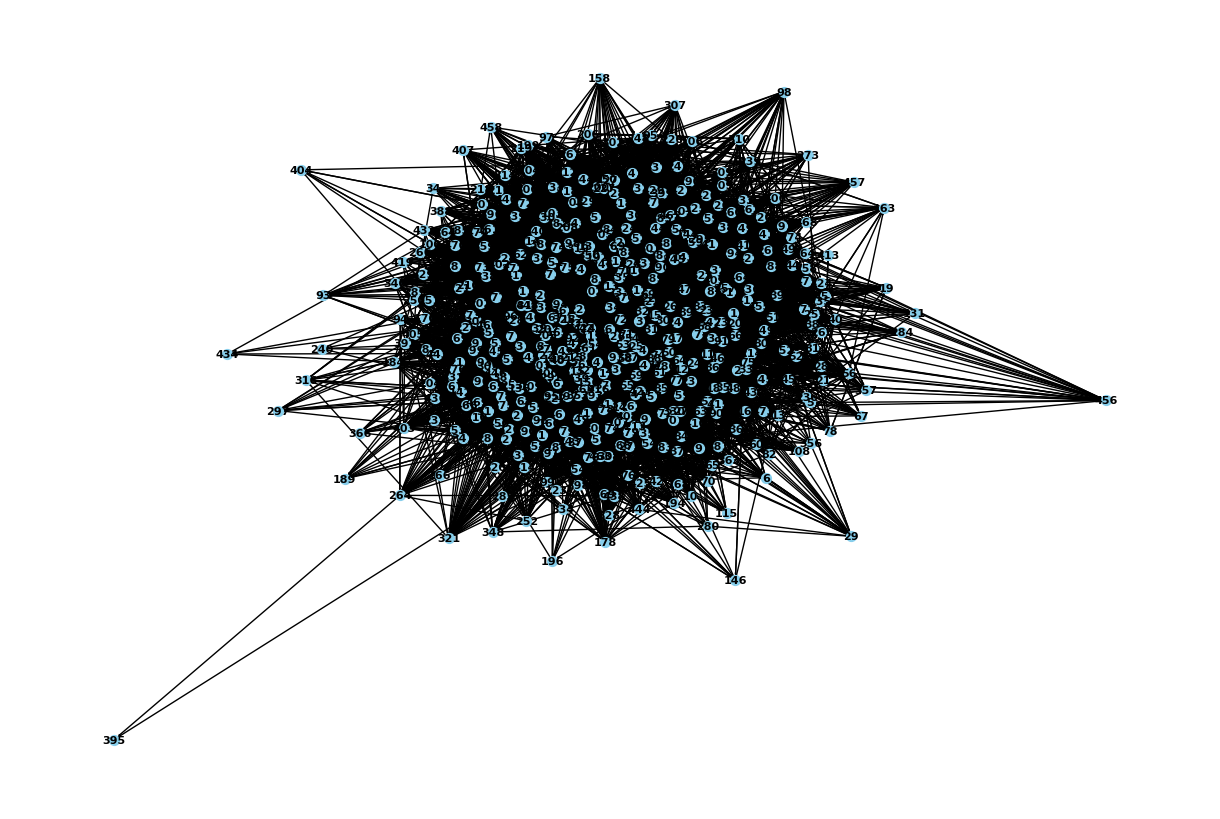

In [ ]:
import matplotlib.pyplot as plt

# Choose a different layout algorithm
pos = nx.kamada_kawai_layout(web_graph)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Visualize the graph
nx.draw(web_graph, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrowsize=1)

# Display the plot
plt.show()


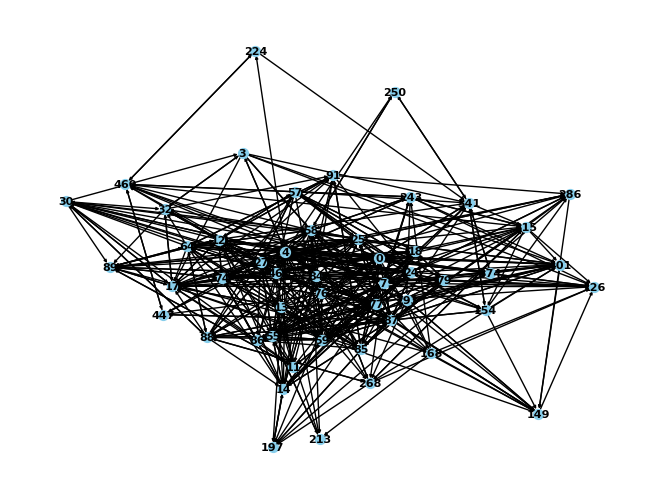

In [ ]:
import matplotlib.pyplot as plt
subgraph_nodes = list(web_graph.nodes())[:50]  # Adjust the number as needed
subgraph = web_graph.subgraph(subgraph_nodes)

pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrowsize=4)
plt.show()


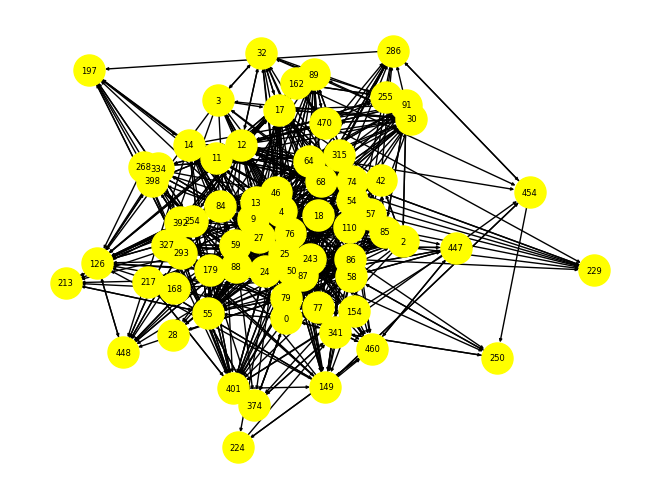

In [ ]:
subgraph_nodes = list(web_graph.nodes())[:70]  # Adjust the number as needed
subgraph = web_graph.subgraph(subgraph_nodes)

pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color='yellow', font_size=6, font_color='black', font_weight='light', arrowsize=4)
plt.show()

the code immediately below takes very long to execute. The likely reason for the slow execution is that the code is trying to iterate over all pairs of nodes in the graph to construct the matrix, which can be very time-consuming for large graphs. hence we'll consider working on a subset of that graph instead.

In [ ]:
# Get the number of nodes in the graph
num_nodes = len(web_graph.nodes())

# Construct a transition probability matrix
pagerank_matrix = np.zeros((num_nodes, num_nodes))
for i, node_i in enumerate(web_graph.nodes()):
    for j, node_j in enumerate(web_graph.nodes()):
        if node_j in web_graph.neighbors(node_i):
            pagerank_matrix[i, j] = 1 / len(list(web_graph.neighbors(node_i)))

# Display the matrix
print("Transition Probability Matrix:")
print(pagerank_matrix)


Transition Probability Matrix:
[[0.         0.05       0.05       ... 0.         0.         0.        ]
 [0.02857143 0.         0.02857143 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
subgraph_nodes = list(web_graph.nodes())[:100]  # Adjust the number as needed
subgraph = web_graph.subgraph(subgraph_nodes)

# Get the number of nodes in the graph
num_subNodes = len(subgraph.nodes())

# Construct a transition probability matrix
pagerank_matrix = np.zeros((num_subNodes, num_subNodes))
for i, node_i in enumerate(subgraph.nodes()):
    for j, node_j in enumerate(subgraph.nodes()):
        if node_j in subgraph.neighbors(node_i):
            pagerank_matrix[i, j] = 1 / len(list(subgraph.neighbors(node_i)))

# pagerank_matrix = np.round_(pagerank_matrix, decimals=3)

# Display the matrix
print("Transition Probability Matrix:")
print(pagerank_matrix)

Transition Probability Matrix:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.05555556 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.08333333 0.         0.         ... 0.         0.         0.        ]
 [0.         0.07692308 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
sum_rows = np.sum(pagerank_matrix[5])
print(sum_rows)

1.0


In [ ]:
print("Nodes in Subgraph:", subgraph.nodes())
print("Edges in Subgraph:", subgraph.edges())

Nodes in Subgraph: ['254', '79', '32', '87', '213', '18', '42', '71', '91', '398', '27', '393', '50', '30', '72', '136', '179', '229', '54', '460', '470', '374', '75', '70', '47', '447', '147', '14', '123', '86', '53', '450', '161', '168', '442', '12', '13', '334', '293', '448', '68', '4', '341', '55', '138', '154', '85', '74', '160', '149', '76', '89', '247', '255', '126', '190', '0', '11', '217', '64', '21', '452', '286', '268', '193', '24', '110', '9', '25', '17', '315', '387', '3', '392', '224', '197', '59', '2', '401', '327', '88', '58', '250', '454', '46', '84', '77', '215', '162', '243', '48', '278', '111', '28', '80', '61', '205', '403', '57', '299']
Edges in Subgraph: [('254', '12'), ('254', '84'), ('254', '111'), ('254', '123'), ('254', '126'), ('254', '136'), ('254', '147'), ('254', '160'), ('254', '161'), ('254', '193'), ('254', '197'), ('254', '205'), ('254', '213'), ('254', '243'), ('254', '247'), ('254', '250'), ('254', '327'), ('254', '341'), ('254', '393'), ('254', '39

In [ ]:
# subgraph_nodes = list(web_graph.nodes())[:1000]  # Adjust the number as needed
# subgraph = web_graph.subgraph(subgraph_nodes)

# # Get the number of nodes in the graph
# num_subNodes = len(subgraph.nodes())

# # Damping factor
# alpha = 0.85

# # Get the number of nodes in the graph
# num_subNodes = len(subgraph.nodes())

# # Initialize the PageRank scores
# pagerank_scores = np.ones(num_subNodes) / num_subNodes

# # Maximum number of iterations
# max_iter = 100
# tolerance = 1e-6

# for _ in range(max_iter):
#     # Store the current PageRank scores
#     old_pagerank_scores = pagerank_scores.copy()

#     # Update the PageRank scores iteratively
#     adjacency_matrix = nx.adjacency_matrix(subgraph).toarray()
#     pagerank_scores = alpha * np.dot(adjacency_matrix, pagerank_scores) + (1 - alpha) / num_subNodes

#     # Check for convergence
#     if np.linalg.norm(pagerank_scores - old_pagerank_scores, 1) < tolerance:
#         break

# # Display the final PageRank scores
# for node, score in sorted(enumerate(pagerank_scores), key=lambda x: x[1], reverse=True):
#     print(f"Node {node}: PageRank Score {score}")

# print()

# # Display the Google PageRank matrix
# print("Google PageRank Matrix:")
# print(np.outer(pagerank_scores, np.ones(num_subNodes)))

# print()
# print(np.sum(pagerank_scores[1]))

Node 303: PageRank Score 0.0006162084400576515
Node 121: PageRank Score 0.0006084949128833475
Node 88: PageRank Score 0.0005820157342026136
Node 270: PageRank Score 0.0005777150858882859
Node 59: PageRank Score 0.000530141085217393
Node 433: PageRank Score 0.0005203410726872305
Node 412: PageRank Score 0.0005188412879538289
Node 279: PageRank Score 0.000494345252077298
Node 396: PageRank Score 0.0004907791790257106
Node 313: PageRank Score 0.0004858927741489508
Node 219: PageRank Score 0.00046716538927304394
Node 107: PageRank Score 0.00046544464625451493
Node 129: PageRank Score 0.0004648864396229602
Node 430: PageRank Score 0.00046477430022324133
Node 461: PageRank Score 0.00046236083064662547
Node 347: PageRank Score 0.0004615656614189381
Node 424: PageRank Score 0.00046076758007523925
Node 52: PageRank Score 0.0004567068802796791
Node 314: PageRank Score 0.00045623210020679565
Node 32: PageRank Score 0.00045452992241072523
Node 454: PageRank Score 0.0004525966472034168
Node 299: Pa

In [ ]:
# # Get the number of nodes in the graph
# num_nodes = len(web_graph.nodes())

# # Damping factor
# alpha = 0.85

# # Get the number of nodes in the graph
# num_nodes = len(web_graph.nodes())

# # Initialize the PageRank scores
# pagerank_scores = np.ones(num_nodes) / num_nodes

# # Maximum number of iterations
# max_iter = 100
# tolerance = 1e-6

# for _ in range(max_iter):
#     # Store the current PageRank scores
#     old_pagerank_scores = pagerank_scores.copy()

#     # Update the PageRank scores iteratively
#     adjacency_matrix = nx.adjacency_matrix(web_graph).toarray()
#     pagerank_scores = alpha * np.dot(adjacency_matrix, pagerank_scores) + (1 - alpha) / num_nodes

#     # Check for convergence
#     if np.linalg.norm(pagerank_scores - old_pagerank_scores, 1) < tolerance:
#         break

# # Display the final PageRank scores
# for node, score in sorted(enumerate(pagerank_scores), key=lambda x: x[1], reverse=True):
#     print(f"Node {node}: PageRank Score {score}")

# print()

# # Display the Google PageRank matrix
# print("Google PageRank Matrix:")
# print(np.outer(pagerank_scores, np.ones(num_nodes)))

Node 303: PageRank Score 0.0006162084400576515
Node 121: PageRank Score 0.0006084949128833475
Node 88: PageRank Score 0.0005820157342026136
Node 270: PageRank Score 0.0005777150858882859
Node 59: PageRank Score 0.000530141085217393
Node 433: PageRank Score 0.0005203410726872305
Node 412: PageRank Score 0.0005188412879538289
Node 279: PageRank Score 0.000494345252077298
Node 396: PageRank Score 0.0004907791790257106
Node 313: PageRank Score 0.0004858927741489508
Node 219: PageRank Score 0.00046716538927304394
Node 107: PageRank Score 0.00046544464625451493
Node 129: PageRank Score 0.0004648864396229602
Node 430: PageRank Score 0.00046477430022324133
Node 461: PageRank Score 0.00046236083064662547
Node 347: PageRank Score 0.0004615656614189381
Node 424: PageRank Score 0.00046076758007523925
Node 52: PageRank Score 0.0004567068802796791
Node 314: PageRank Score 0.00045623210020679565
Node 32: PageRank Score 0.00045452992241072523
Node 454: PageRank Score 0.0004525966472034168
Node 299: Pa

In [ ]:
# print(pagerank_scores)
# print()
# sum_rows = np.sum(pagerank_scores)
# print(sum_rows)

# testMatrix = np.outer(pagerank_scores, np.ones(num_nodes))
# print(testMatrix)
# print()
# print(np.sum(testMatrix))

[0.00034113 0.000359   0.00035456 0.00036867 0.00036993 0.00033587
 0.00039294 0.00035164 0.00035363 0.00035203 0.00035182 0.00042196
 0.00035451 0.00035198 0.00035786 0.00041349 0.00044678 0.00033004
 0.00037996 0.00037323 0.00033727 0.0003364  0.00036124 0.00033377
 0.00038708 0.00036953 0.00035377 0.00034655 0.00040426 0.00034557
 0.00033846 0.00033384 0.00045453 0.00032168 0.00033465 0.00034632
 0.0003449  0.00033635 0.00035459 0.00032982 0.00035583 0.00037206
 0.0003528  0.000339   0.00034388 0.00037303 0.00034873 0.00034285
 0.00033252 0.00032961 0.00035294 0.00038842 0.00045671 0.00035288
 0.00033116 0.00034333 0.0003537  0.00033517 0.00033477 0.00053014
 0.00036053 0.00040638 0.00034473 0.00039714 0.00040247 0.00033821
 0.00034558 0.00034469 0.0003328  0.00032361 0.00033626 0.00033693
 0.00033462 0.00037188 0.00038446 0.00042138 0.00033656 0.00040144
 0.0003287  0.00034466 0.00038008 0.00035119 0.00035806 0.00035351
 0.00036177 0.00032318 0.00037891 0.00036064 0.00058202 0.0003

In [ ]:
# import numpy as np

# # Assuming 'web_graph' is your directed graph (NetworkX DiGraph)
# alpha = 0.85  # Damping factor

# # Get the number of nodes in the graph
# num_nodes = len(web_graph.nodes())

# # Construct the Google PageRank matrix
# pagerank_matrix = alpha * nx.to_numpy_matrix(web_graph) + (1 - alpha) / num_nodes * np.outer(np.ones(num_nodes), np.ones(num_nodes))

# # Print the Google PageRank matrix
# print("Google PageRank Matrix:")
# print(pagerank_matrix)


AttributeError: ignored

In [ ]:
# pos = nx.circular_layout(web_graph)  # or nx.random_layout(web_graph)
# nx.draw(web_graph, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrowsize=8)
# plt.show()


In [ ]:
# import plotly.graph_objects as go

# pos = nx.spring_layout(web_graph)

# edge_x = []
# edge_y = []
# for edge in web_graph.edges():
#     x0, y0 = pos[edge[0]]
#     x1, y1 = pos[edge[1]]
#     edge_x.extend([x0, x1, None])
#     edge_y.extend([y0, y1, None])

# edge_trace = go.Scatter(
#     x=edge_x, y=edge_y,
#     line=dict(width=0.5, color='#888'),
#     hoverinfo='none',
#     mode='lines')

# node_x = []
# node_y = []
# for node in web_graph.nodes():
#     x, y = pos[node]
#     node_x.append(x)
#     node_y.append(y)

# node_trace = go.Scatter(
#     x=node_x, y=node_y,
#     mode='markers',
#     hoverinfo='text',
#     marker=dict(
#         showscale=True,
#         colorscale='YlGnBu',
#         size=10,
#         colorbar=dict(
#             thickness=15,
#             title='Node Connections',
#             xanchor='left',
#             titleside='right'
#         )
#     )
# )

# fig = go.Figure(data=[edge_trace, node_trace],
#              layout=go.Layout(
#                 showlegend=False,
#                 hovermode='closest',
#                 margin=dict(b=0,l=0,r=0,t=0),
#                 xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#                 yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
#                 )
# fig.show()
